In [1]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from textblob import TextBlob 
!pip install --upgrade gensim
from gensim import models
from gensim.models import Word2Vec
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
nltk.download('punkt')
import re
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

Requirement already up-to-date: gensim in c:\users\trisha\anaconda3\lib\site-packages (3.8.3)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Trisha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Trisha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
pip install wordcloud

In [3]:
#List of list [[tweet1],[tweet2],...]
tweet_txt = [] 
#Read 1.txt
for i in range(0,163837):
    filename = "Tweet_Data_May\\"+str(i)+".txt" #Capture local fetched data
    try:
        with open(filename, 'r') as filereader: 
            r = filereader.readlines()
            tweet_txt.append(r)
    except FileNotFoundError:
        pass

In [4]:
tweet_txt[1]

['cbc intentionally exclude crucial facts epoch time coverage beijings coverup virus outbreak download epoch time app see exclusive coronavirus coverage daily update\n']

In [ ]:
tweet_str=""
for j in range(0,len(tweet_txt)):
    tweet_str=tweet_str+re.sub('/\r?\n|\r/','',tweet_txt[j][0].rstrip())
    tweet_str=tweet_str+" "


In [ ]:
tweet_txt[700]

In [ ]:
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(tweet_str)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
def get_tweet_sentiment(tweet): 
    # create TextBlob object of passed tweet text 
    analysis = TextBlob(tweet) 
    # set sentiment 
    if analysis.sentiment.polarity > 0: 
        print(analysis.sentiment.polarity)
        return 'positive'
    elif analysis.sentiment.polarity == 0: 
        return 'neutral'
    else: 
        return 'negative'

In [ ]:
ptweet=[]
ntweet=[]
neutweet=[]
for k in range(0,len(tweet_txt)):
    result=get_tweet_sentiment(tweet_txt[k][0].rstrip())
    if(result=='positive'): #
        ptweet.append(tweet_txt[k])
        #print(tweet_txt[k])
    if(result=='negative'):
        ntweet.append(tweet_txt[k])
    if(result=='neutral'):
        neutweet.append(tweet_txt[k])
print("done")

In [ ]:
len(ptweet)

In [ ]:
len(neutweet)

In [ ]:
len(ntweet)

In [ ]:
# percentage of positive tweets 
print("Positive tweets percentage: {} %".format(100*len(ptweet)/len(tweet_txt))) 
# percentage of negative tweets 
print("Negative tweets percentage: {} %".format(100*len(ntweet)/len(tweet_txt))) 
# percentage of neutral tweets 
print("Neutral tweets percentage: {} %  ".format(100*(len(neutweet))/len(tweet_txt))) 
  

In [5]:
for j in range(1,len(tweet_txt)):
    token_words=""
    #if 8.txt contains article, not empty
    if tweet_txt[j]:
        token_words = "".join(tweet_txt[j])
        word_tokens = word_tokenize(token_words) 
        tweet_txt[j] = word_tokens
    else:
        #discards the file with no article due to Http 404 or 500 error
        print("empty",j)
print("done")
#article_txt = [['This','is','Apple'],['This','is','ball'],...]

done


In [6]:
# train model w2v
model = Word2Vec(tweet_txt, min_count=1)
# summarize the loaded model
print(model)
# summarize vocabulary
words = list(model.wv.vocab)

Word2Vec(vocab=93654, size=100, alpha=0.025)


In [47]:

keys = ['pandemic','vaccine']

embedding_clusters = []
word_clusters = []
for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in model.most_similar(word, topn=100):
        words.append(similar_word)
        embeddings.append(model[similar_word])
    embedding_clusters.append(embeddings)
    word_clusters.append(words)

<ipython-input-47-78e2e7cfbbcf>:8: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  for similar_word, _ in model.most_similar(word, topn=100):
<ipython-input-47-78e2e7cfbbcf>:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  embeddings.append(model[similar_word])


In [48]:
embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape
tsne_model_en_2d = TSNE(perplexity=15, n_components=2, init='pca', n_iter=3500, random_state=32)
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


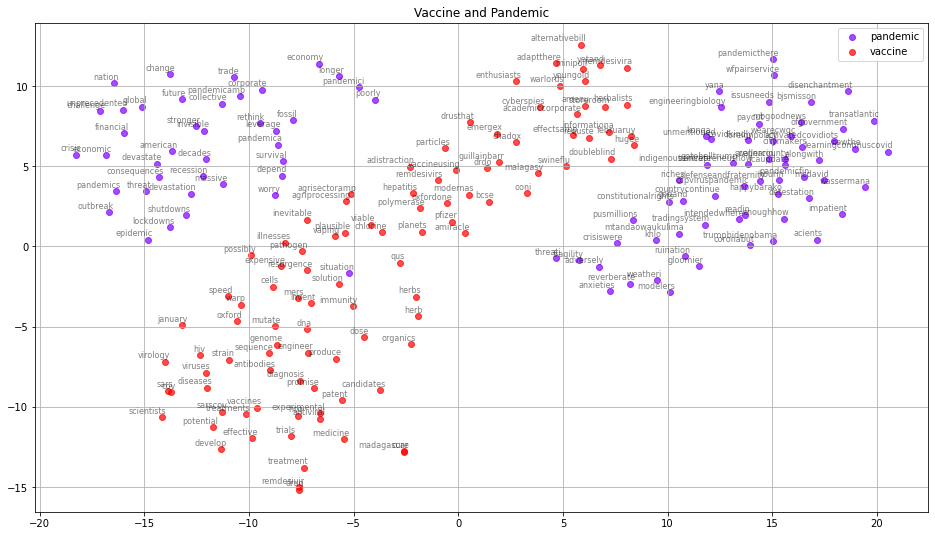

In [49]:
def tsne_plot_similar_words(title, labels, embedding_clusters, word_clusters, a, filename=None):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        plt.scatter(x, y, c=color, alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
                         textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc=1)
    plt.title(title)
    plt.grid(True)
    if filename:
        plt.savefig(filename, format='png', dpi=150, bbox_inches='tight')
    plt.show()


tsne_plot_similar_words('Vaccine and Pandemic', keys, embeddings_en_2d, word_clusters, 0.7,
                        'similar_words.png')